In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## All experiments

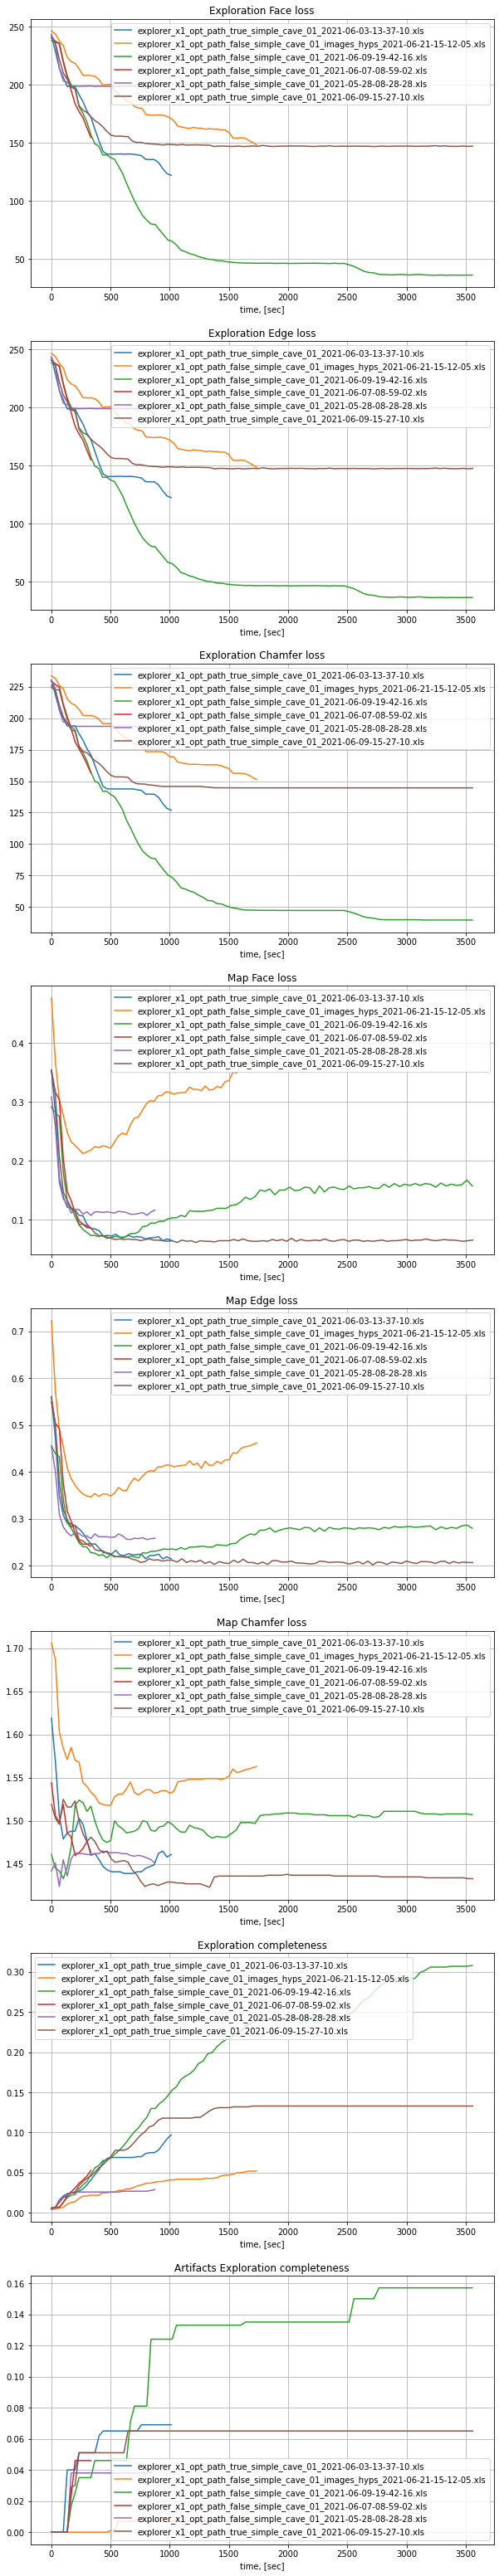

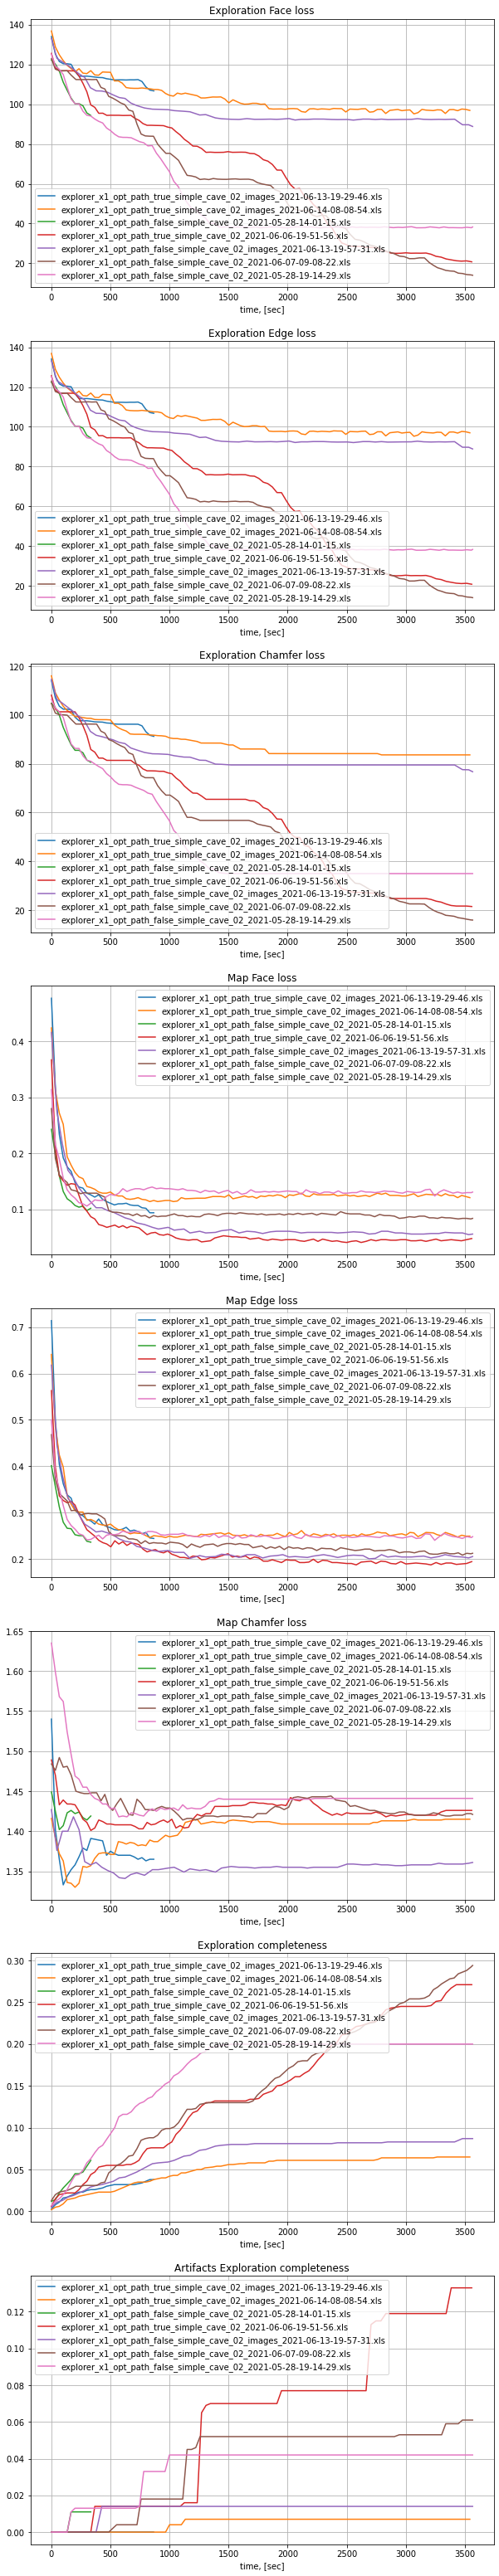

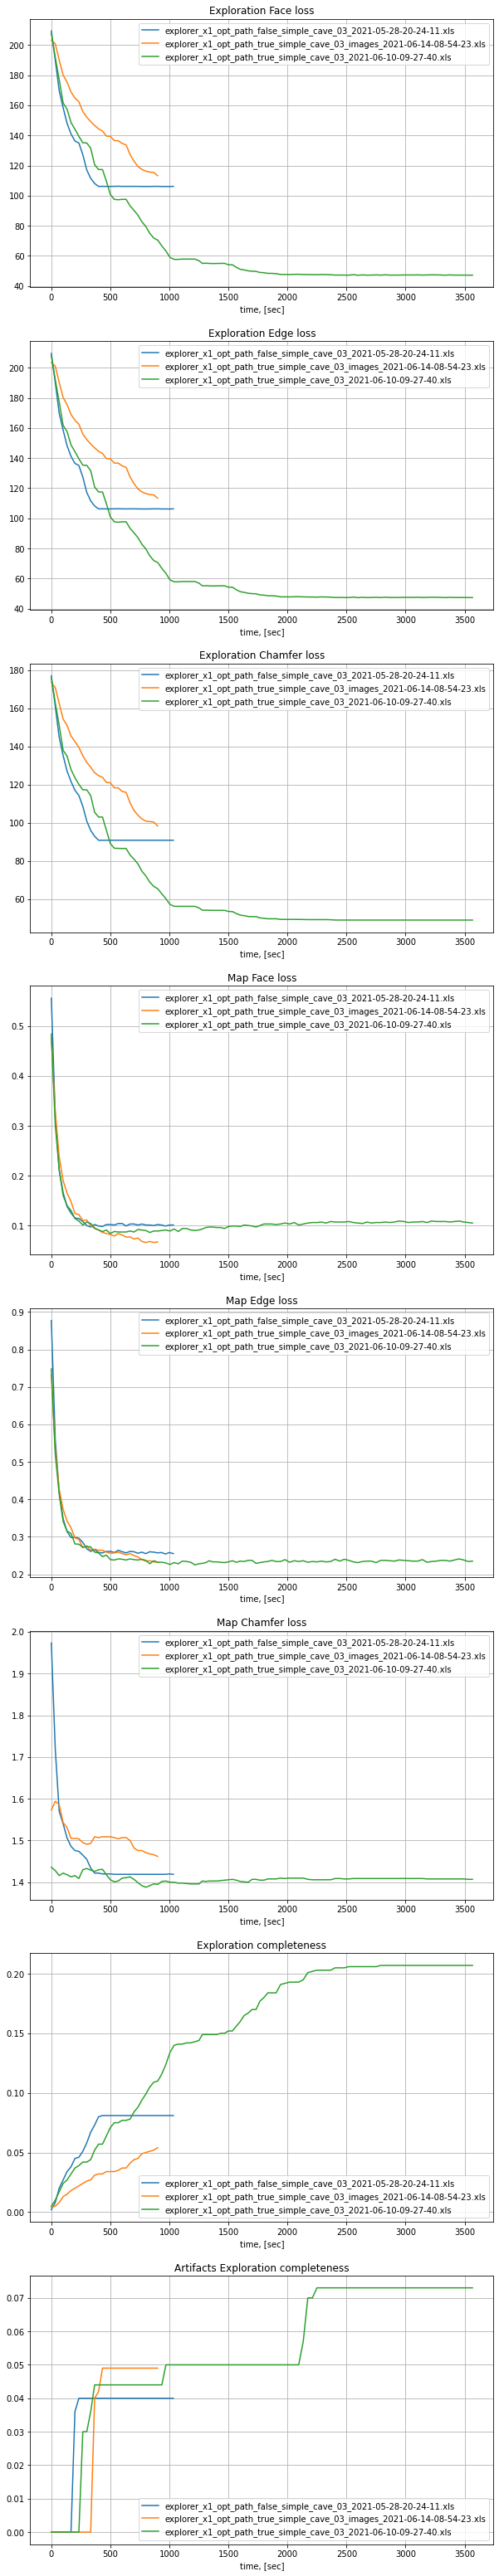

In [2]:
common_metrics = [
            "Exploration Face loss",
            "Exploration Edge loss",
            "Exploration Chamfer loss",
            "Map Face loss",
            "Map Edge loss",
            "Map Chamfer loss",
            "Exploration completeness",
            "Artifacts Exploration completeness",
#             "Detections score",
#             "N of constructed points"
          ]

worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]

PATH = '../data/bags/mapping_eval/'

for world in worlds:
    xls_files = [file for file in os.listdir(PATH) if 'xls' in file and world in file]

    plt.figure(figsize=(10, 7*len(common_metrics)))
    plt.title(f"World: {world}")
    for i, metric in enumerate(common_metrics):
        plt.subplot(len(common_metrics), 1, i+1)
        plt.title(metric)
        for file in xls_files:
            data = pd.read_excel(os.path.join(PATH, file))
            if metric in data:
                plt.plot(data['Time stamp'] - data['Time stamp'][0], data[metric], label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.legend();

In [3]:
ls ../data/bags/mapping_eval/*.xls

../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_2021-05-28-08-28-28.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_2021-06-07-08-59-02.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_2021-06-09-19-42-16.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_images_hyps_2021-06-21-15-12-05.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_2021-05-28-14-01-15.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_2021-05-28-19-14-29.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_2021-06-07-09-08-22.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_images_2021-06-13-19-57-31.xls
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_03_2021-05-28-20-24-11.xls
../data/bags/mapping_eval/explorer_x1_opt_path_true_simple_cave_01_2021-06-03-13-37-10.xls
../data/bags/mapping_eval/explorer_x1_opt_path_true_simple_cav

In [4]:
ls ../data/bags/mapping_eval/*.bag

../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_2021-05-28-08-28-28.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_2021-06-07-08-59-02.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_2021-06-09-19-42-16.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_images_hyps_2021-06-21-15-12-05.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_2021-05-28-14-01-15.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_2021-05-28-19-14-29.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_2021-06-07-09-08-22.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_02_images_2021-06-13-19-57-31.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_03_2021-05-28-20-24-11.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_tunnel_01.bag
../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_tunnel_02.bag
../da